In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [48]:
img = cv2.imread("/kaggle/input/images-sample/Python.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [49]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

In [50]:
outlines = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 3)

In [51]:
color = cv2.bilateralFilter(img, 9, 250, 250)

In [52]:
cartoon = cv2.bitwise_and(color, color, mask=outlines)

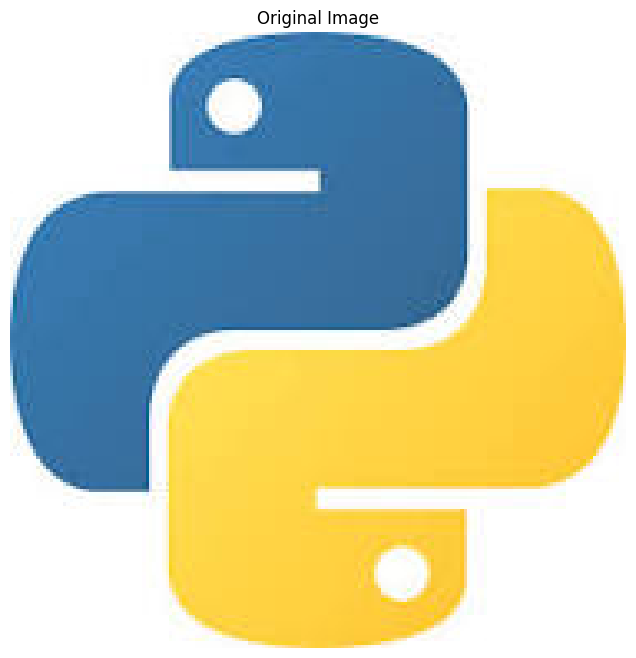

In [53]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

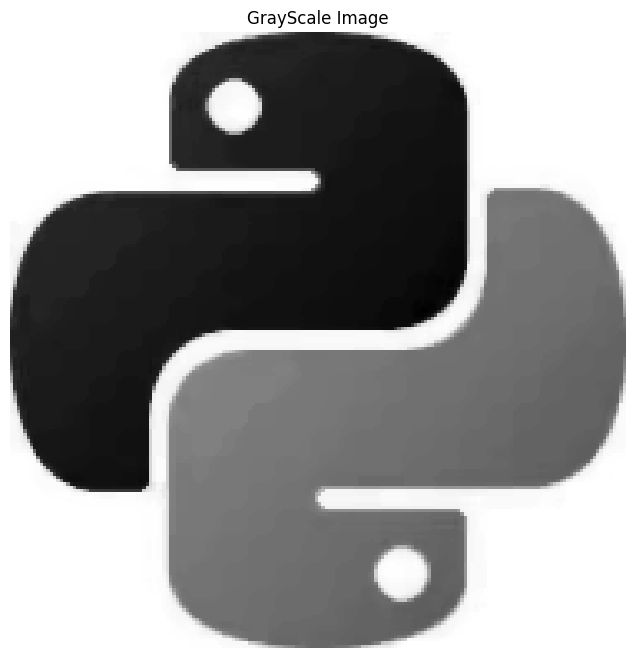

In [54]:
plt.figure(figsize=(8,8))
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.show()

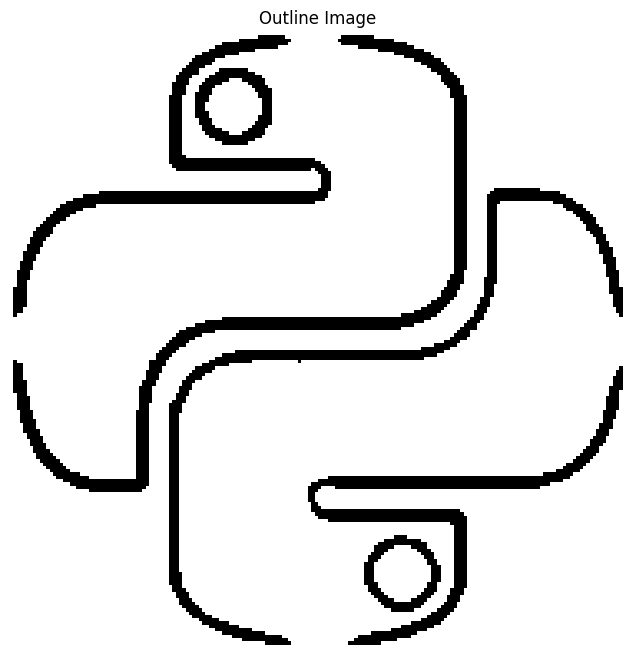

In [55]:
plt.figure(figsize=(8,8))
plt.imshow(outlines, cmap="gray")
plt.axis("off")
plt.title("Outline Image")
plt.show()

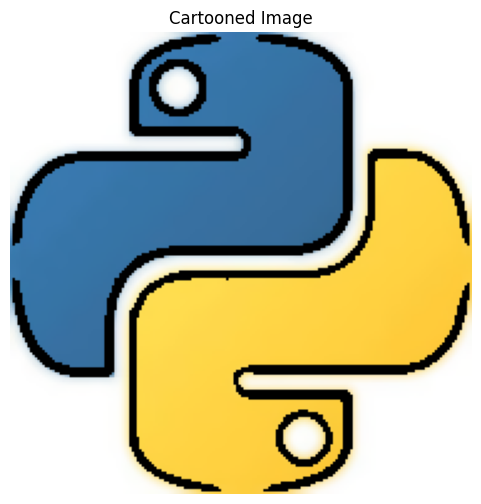

In [57]:
plt.figure(figsize=(6,6))
plt.imshow(cartoon, cmap="gray")
plt.axis("off")
plt.title("Cartooned Image")
plt.show()

In [58]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [62]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

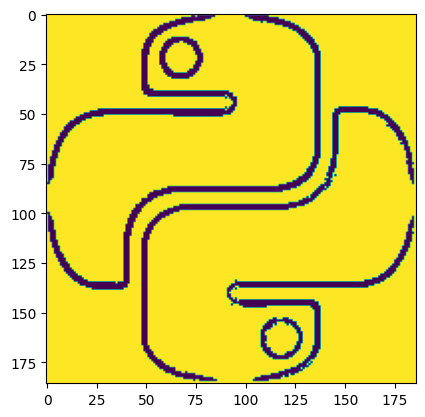

In [64]:
line_size = 7
blur_value = 7

edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges)

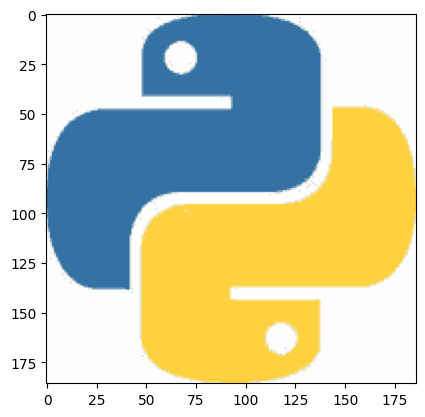

In [65]:
total_color = 9
img = color_quantization(img, total_color)
plt.imshow(img)

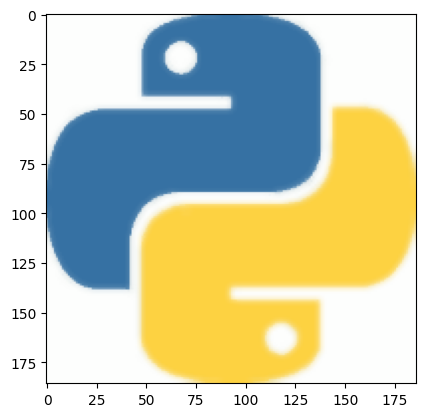

In [67]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)

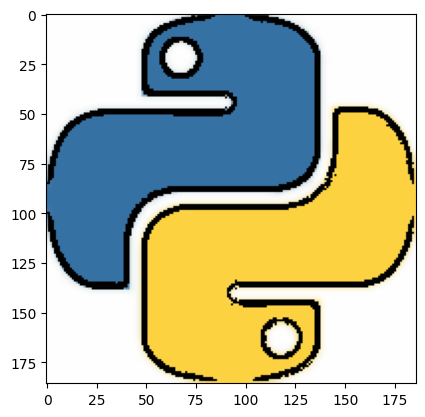

In [69]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
plt.imshow(cartoon)

Conclusion: -
    - This project is divided into 2 parts where a different method is used in each.
    
        1st Method:-
        - Adaptive threshold is used to detect edges after blurring the image and converting it into a grayscale.
        - Edge highlight is included in order to make an image look like a cartoon.
        - A bilateral filter reduces noise from an image and make outlines seem sharper.
        - A bitwise_and operator extracts useful part of the image and combine with other images. 
        
        2nd Method:-
        - Using color quantization. This is where a K-Means clustering is used to reduce the number of colors and make them seem simple rather than complex. A drawingn had fewer colors than a photo and color quantization helps in this specific task. (https://towardsdatascience.com/turn-photos-into-cartoons-using-python-bb1a9f578a7e)
        - An edge mask is used to highlight the outline of the image. This follows the same operations from previous method.